## AN ANALYSIS OF FACTORS THAT INFLUENCE MIGRATION USING NETWORK ANALYSIS


The contributions on this project have been provided by : <br>
* Andres Castro  <br>
* Archana Krishnamurthy   <br>
* Tharakesavulu Vangalapat   <br>

# 1. Introduction

In this notebook network science concepts are used to identify immigration , emmigration patterns and its plausible causal factors. International migration has increased far more then previous years due to ease of travel , improved modes of communication & better air / road traffic networks. The world bank database has been utilized to study the factors that show an impact on immigration between the years 1990 - 2009. This study is a prototype which can be used for larger datasets of migration data. 

# 2. Project Abstract

These are the concepts that this project highlights: <br>
* centrality <br>
* modularity <br>
* communities <br>
* Graph attributes such as assortivity and transtitivity<br>

# 3. Questions and hypotheses


Using the world bank data & netwrok science concepts, perform analysis and perform the following activities

● Identify indices among the network of people migrations (Nodes and Edges)

● Identify a pattern of people migrating from one country to another(using links between the nodes and edges where one country is the source and another the destination)

● Find the centralities among the network of countries

● Determine an optimum modularity and generate communities

# 4. Generate Network Model

In [3]:
import csv
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community 

In [4]:
import pandas as pd
df = pd.read_excel (r'Data_Extract_From_Global_Bilateral_Migration2000.xlsx', sheet_name='Sheet1')
nodes_list = df['Country Origin Code'].unique()
df_adjList = list(zip(df['Country Origin Code'].map(str), df['Country Dest Code'].map(str),df['Total [TOT]'].map(str)))
df.head()

Country Origin Name Country Origin Code  Year  Year Code Country Dest Name  \
0         Afghanistan                 AFG  2000       2000           Algeria   
1         Afghanistan                 AFG  2000       2000           Andorra   
2         Afghanistan                 AFG  2000       2000           Armenia   
3         Afghanistan                 AFG  2000       2000         Australia   
4         Afghanistan                 AFG  2000       2000           Austria   

  Country Dest Code  Total [TOT]  Female [FEM]  Male [MAL]  
0               DZA            8             4           4  
1               AND            6             3           3  
2               ARM            7             4           3  
3               AUS        11128          4449        6679  
4               AUT         2488           854        1634

In [5]:
#generating the digraph
import networkx as nx
G = nx.DiGraph()
G.add_nodes_from(nodes_list)
G.add_weighted_edges_from(df_adjList)
nx.write_gexf(G, "digraphProjectweighted.gexf")

In [6]:
#Removing spaces from the column Names
dfrename=df
dfrename.columns = dfrename.columns.str.strip().str.lower().str.replace(' ', '').str.replace('(', '').str.replace(')', '')
dfrename.head()

countryoriginname countryorigincode  year  yearcode countrydestname  \
0       Afghanistan               AFG  2000      2000         Algeria   
1       Afghanistan               AFG  2000      2000         Andorra   
2       Afghanistan               AFG  2000      2000         Armenia   
3       Afghanistan               AFG  2000      2000       Australia   
4       Afghanistan               AFG  2000      2000         Austria   

  countrydestcode  total[tot]  female[fem]  male[mal]  
0             DZA           8            4          4  
1             AND           6            3          3  
2             ARM           7            4          3  
3             AUS       11128         4449       6679  
4             AUT        2488          854       1634

##### 4.1 Using the Above data the folowing graphs were generated in Gephi. https://gephi.org/

Identified the top 10 countries within the 4 communities where immigration is relatively more. Visibly, USA has notable migrant population , followed  by the United Kingdom.

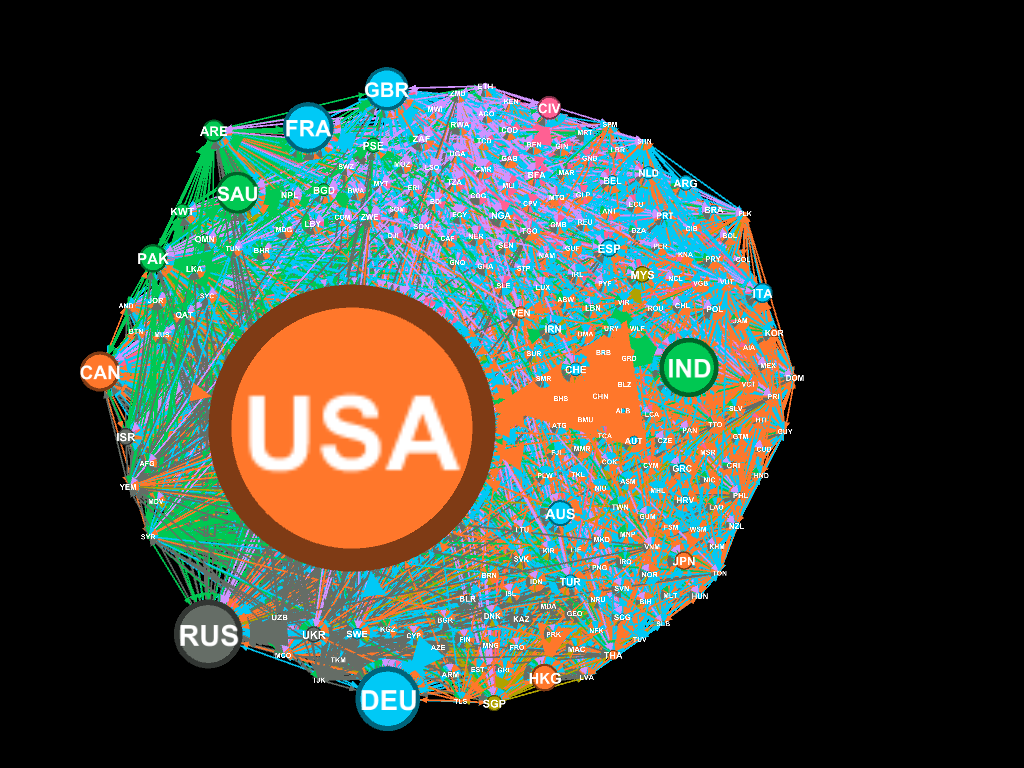

Identified the top 10 countries within the 6 communities where 6mmigration is relatively more.Mexico and India seem to be the countries that have larger populations moving elsewhere.

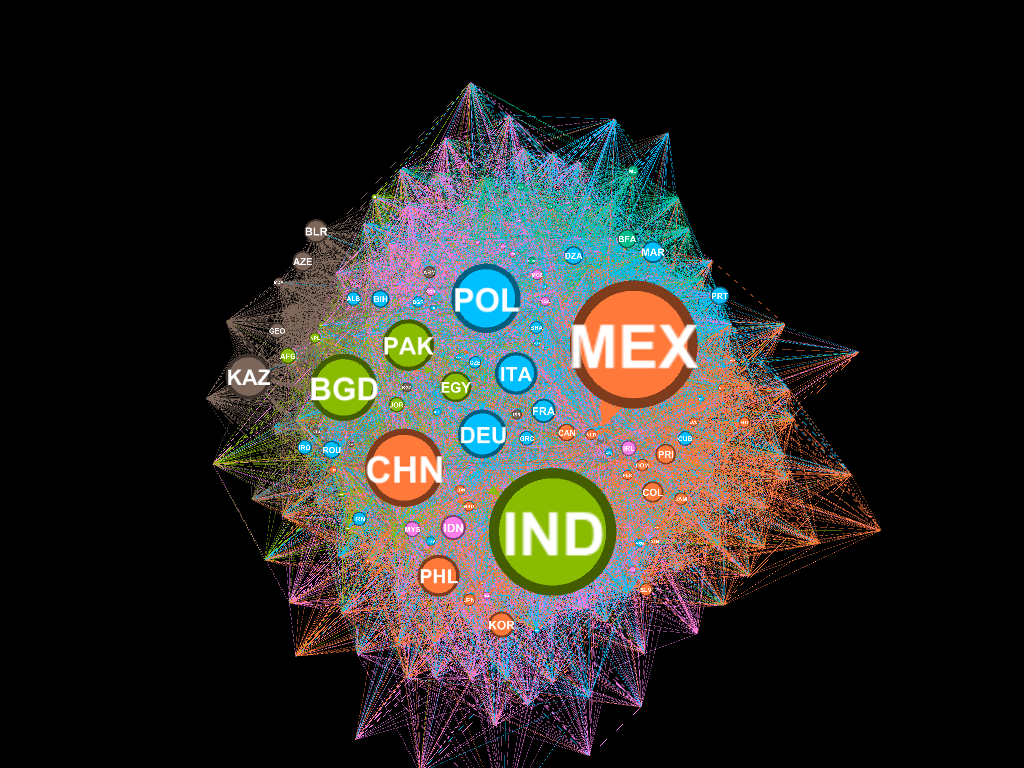

Observed the betweenness centrality as the most significant among all top 10 countries identified for immigration and emigration.Indicating Poland and France having higher significance in the year 2000.  <br>

betweenness centrality is a measure of centrality in a graph based on shortest paths. For every pair of vertices in a connected graph, there exists at least one shortest path between the vertices such that either the number of edges that the path passes through (for unweighted graphs) or the sum of the weights of the edges (for weighted graphs) is minimized. The betweenness centrality for each vertex is the number of these shortest paths that pass through the vertex. Reference: https://en.wikipedia.org/wiki/Betweenness_centrality  <br>

The data cleansing steps to generate the graphs to prove out the centralities are as follows:

#### 4.2 Analysis of graph data based on weighted Out degree (Countries people prefer migrating away from)

In [7]:
#Filter top10 as shown in the Directed Weighted graoh by observing the weighted in-degree and weighted out-degree
dfemifilter = pd.read_csv (r'project_migrationgexftableweight.csv')
dfemifiltertop10=dfemifilter.sort_values(by='weighted outdegree', ascending=False)
dfemifiltertop10=dfemifiltertop10.nlargest(10, 'weighted outdegree')
dfemifiltertop10=dfemifiltertop10[['Label']]
dfemifiltertop10

Label
129   MEX
90    IND
40    CHN
160   POL
16    BGD
153   PAK
73    DEU
100   KAZ
96    ITA
159   PHL

Above are the top 10 countries for emigration identified from the Network plotted.

In [8]:
dfemifiltertopanalysis=dfrename[dfrename.countryorigincode.isin(dfemifiltertop10.Label)]
dfemifiltertopanalysis.head()

countryoriginname countryorigincode  year  yearcode countrydestname  \
1650        Bangladesh               BGD  2000      2000     Afghanistan   
1651        Bangladesh               BGD  2000      2000         Andorra   
1652        Bangladesh               BGD  2000      2000          Angola   
1653        Bangladesh               BGD  2000      2000       Australia   
1654        Bangladesh               BGD  2000      2000         Austria   

     countrydestcode  total[tot]  female[fem]  male[mal]  
1650             AFG       41817        16852      24965  
1651             AND           6            2          4  
1652             AGO           3            1          2  
1653             AUS        8943         3576       5368  
1654             AUT        1632          450       1182

In [9]:
dfemifiltertopanalysis.head()

countryoriginname countryorigincode  year  yearcode countrydestname  \
1650        Bangladesh               BGD  2000      2000     Afghanistan   
1651        Bangladesh               BGD  2000      2000         Andorra   
1652        Bangladesh               BGD  2000      2000          Angola   
1653        Bangladesh               BGD  2000      2000       Australia   
1654        Bangladesh               BGD  2000      2000         Austria   

     countrydestcode  total[tot]  female[fem]  male[mal]  
1650             AFG       41817        16852      24965  
1651             AND           6            2          4  
1652             AGO           3            1          2  
1653             AUS        8943         3576       5368  
1654             AUT        1632          450       1182

In [10]:
#Filter top10 as shown in the Directed Weighted graoh by observing the weighted in-degree and weighted out-degree

dfemifiltertopanalysisnodes_list = dfemifiltertopanalysis['countryorigincode'].unique()
dfemifiltertopanalysis_adjList = list(zip(dfemifiltertopanalysis['countryorigincode'].map(str), dfemifiltertopanalysis['countrydestcode'].map(str),df['total[tot]'].map(str)))
Gemitopanalysis = nx.DiGraph()
Gemitopanalysis.add_nodes_from(dfemifiltertopanalysisnodes_list)
Gemitopanalysis.add_weighted_edges_from(dfemifiltertopanalysis_adjList)
nx.write_gexf(Gemitopanalysis, "digraphGemitopanalysis.gexf")

Centrality based network For Emigration

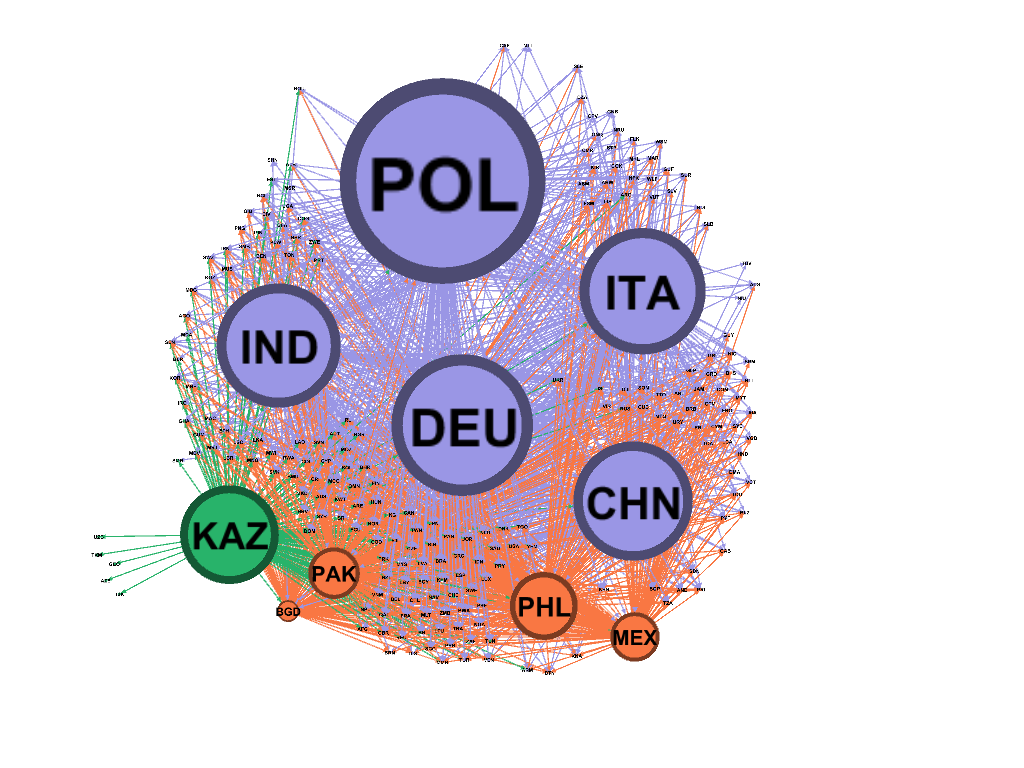

As indicated above, Poland and Italy have significant betweeness centralities.

#### 4.3 Analysis of graph data based on weighted In degree (Countries people prefer migrating towards)

In [11]:
dfimmifilter = pd.read_csv (r'project_migrationgexftableweight.csv')
dfimmifiltertop10=dfimmifilter.sort_values(by='weighted indegree', ascending=False)
dfimmifiltertop10=dfimmifiltertop10.nlargest(10, 'weighted indegree')
dfimmifiltertop10=dfimmifiltertop10[['Label']]
dfimmifiltertop10

Label
213   USA
166   RUS
73    DEU
90    IND
67    FRA
212   GBR
173   SAU
34    CAN
153   PAK
87    HKG

Above are the top 10 countries for emigration identified from the Network plotted.

In [12]:
dfimmifiltertopanalysis=dfrename[dfrename.countrydestcode.isin(dfimmifiltertop10.Label)]
dfimmifiltertopanalysis.head()

countryoriginname countryorigincode  year  yearcode       countrydestname  \
15       Afghanistan               AFG  2000      2000                Canada   
31       Afghanistan               AFG  2000      2000                France   
33       Afghanistan               AFG  2000      2000               Germany   
38       Afghanistan               AFG  2000      2000  Hong Kong SAR, China   
40       Afghanistan               AFG  2000      2000                 India   

   countrydestcode  total[tot]  female[fem]  male[mal]  
15             CAN       21969        10707      11263  
31             FRA        2981         1510       1471  
33             DEU       15529         7573       7957  
38             HKG         599          461        137  
40             IND        9671         4704       4967

In [13]:
dfimmifiltertopanalysisnodes_list = dfimmifiltertopanalysis['countryorigincode'].unique()
dfimmifiltertopanalysis_adjList = list(zip(dfimmifiltertopanalysis['countryorigincode'].map(str), dfimmifiltertopanalysis['countrydestcode'].map(str),df['total[tot]'].map(str)))
Gimmitopanalysis = nx.DiGraph()
Gimmitopanalysis.add_nodes_from(dfimmifiltertopanalysisnodes_list)
Gimmitopanalysis.add_weighted_edges_from(dfimmifiltertopanalysis_adjList)

In [14]:
nx.write_gexf(Gimmitopanalysis, "digraphGimmitopanalysis.gexf")

Centrality based network For Immigration. Significant countries are France and India

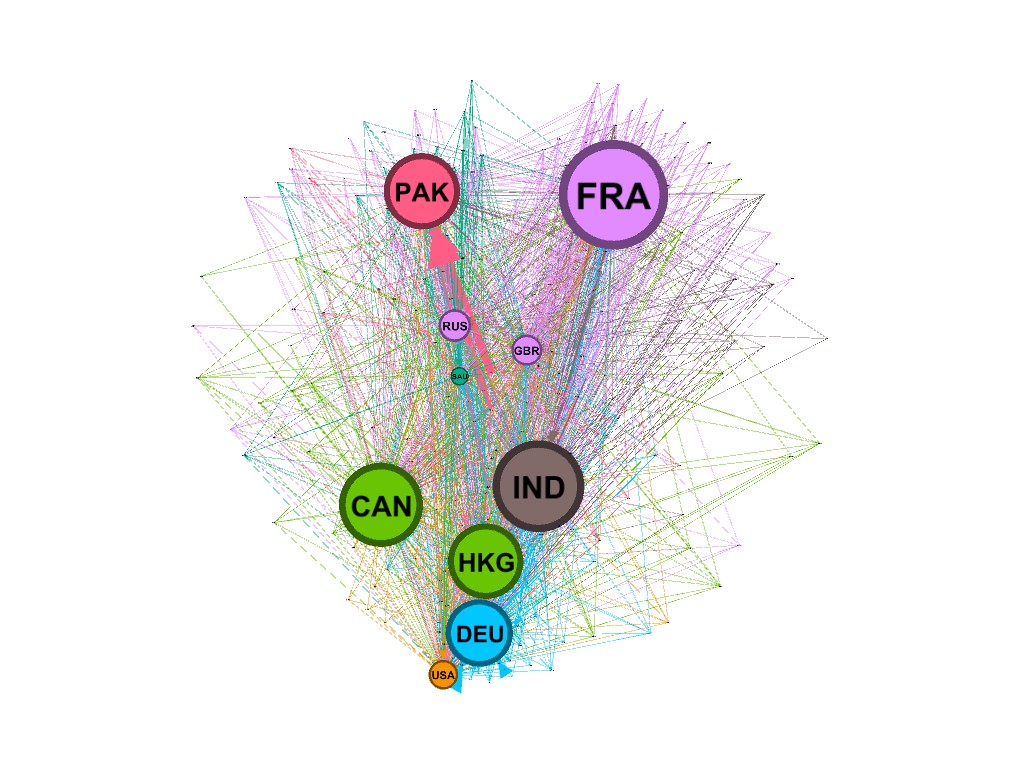

Data from the world bank from 1990 - 2009 has been merged to consider all possible factors for international Migration. <br>
The idea is that migration - be it immigration or emmigration caused by co-related factors would have a positive impact for one country and the inverse for the other. <br> 
For example; if the annual education rate for a target country has increased based on immigration, the education rate in the source country would be negatively impacted leading to brain drain. Hence a combination of all possible factors were consider for the dimensionality reduction. 

### 5. Data Preparation

In [15]:
# Below, 1. we combine the entire dataset from worldbank which contains around 4000+ series codes that contribute to 
# factors and filter by the top countries for immigration and emigration identified in Gephi.
# 2. Get the clean unique series codes that appear in all the datasets (emigration and immigration).
# Benchmark count of a minimum of 18 which will give us the no. of series that can be used to find the Correlation
# This no. is decided based on the no of years that we use in the dataset.
import pandas as pd
import numpy as np
train_df = pd.read_csv('NEWDATA.csv')
eccf=['MEX','IND','CHN','POL','BGD','PAK','DEU','KAZ','ITA','PHL']
train_df_emifilter=train_df[train_df.CountryCode.isin(eccf)]
train_df_emifilter = train_df_emifilter.replace('..',np.nan)
train_df_emifilter.dropna(axis=0, how='any', thresh=10, subset=None, inplace=True)
iccf=['USA','RUS','DEU','IND','FRA','GBR','SAU','CAN','PAK','HKG']
train_df_imifilter=train_df[train_df.CountryCode.isin(iccf)]
train_df_imifilter = train_df_imifilter.replace('..',np.nan)
train_df_imifilter.dropna(axis=0, how='any', thresh=10, subset=None, inplace=True)
# Cleaning and merging the 2 datasets (emigration top 10 and immigration top 10)
train_df_concateseries=pd.concat([train_df_emifilter, train_df_imifilter])
train_df_series = train_df_concateseries.filter(['SeriesCode'], axis=1)
train_df_series = train_df_series[train_df_series.duplicated()]
train_df_series=train_df_series['SeriesCode'].value_counts()
train_df_series=train_df_series.to_frame()
train_df_series.rename(columns={'SeriesCode': 'Counts'}, inplace = True)
train_df_series['Series'] = train_df_series.index
train_df_series['ID'] = np.arange(len(train_df_series))
train_df_seriess=train_df_series.set_index('ID')
train_df_seriess=train_df_seriess[train_df_seriess['Counts'] > 18]

In [16]:
train_df_seriess.head()

Counts             Series
ID                           
0       19     AG.CON.FERT.ZS
1       19  NV.MNF.TECH.ZS.UN
2       19  TM.VAL.MRCH.WL.CD
3       19     EN.CO2.OTHX.ZS
4       19  SP.POP.0014.MA.ZS

In [17]:
# Merging the dataset with emigration countries and series codes that have been indetified to have enough data and are common for all  top 10 countries
merged_inner_emifilter = pd.merge(left=train_df_emifilter, right=train_df_seriess, left_on='SeriesCode', right_on='Series', how='inner')
merged_inner_emifilter.head()

CountryName CountryCode                               SeriesName  \
0  Bangladesh         BGD  Access to electricity (% of population)   
1       China         CHN  Access to electricity (% of population)   
2     Germany         DEU  Access to electricity (% of population)   
3       India         IND  Access to electricity (% of population)   
4       Italy         ITA  Access to electricity (% of population)   

       SeriesCode         1995         1996         1997         1998  \
0  EG.ELC.ACCS.ZS  19.69823647  22.26750946         22.4  27.41957283   
1  EG.ELC.ACCS.ZS  94.90936279  95.24954987   95.5942688   95.9434433   
2  EG.ELC.ACCS.ZS          100          100          100          100   
3  EG.ELC.ACCS.ZS  51.39855576   52.9855957  54.57716751   56.1731987   
4  EG.ELC.ACCS.ZS          100          100          100          100   

          1999         2000  ...         2002         2003         2004  \
0  29.99834251           32  ...   37.6884079  40.21992111         40.6   
1  96.29312897  96.63838959  ...  97.29593658  97.59836578  97.87665558   
2          100          100  ...          100          100          100   
3         60.1  59.36185074  ...         62.3  64.06238556         64.4   
4          100          100  ...          100          100          100   

          2005         2006         2007         2008         2009 Counts  \
0        44.23  50.52510246         46.5  52.61421204  55.11504745     19   
1  98.12897491  98.36579132  98.60068512    98.847229  99.11898041     19   
2          100          100          100          100          100     19   
3  67.08669281         67.9  70.05211639  71.54550934           75     19   
4          100          100          100          100          100     19   

           Series  
0  EG.ELC.ACCS.ZS  
1  EG.ELC.ACCS.ZS  
2  EG.ELC.ACCS.ZS  
3  EG.ELC.ACCS.ZS  
4  EG.ELC.ACCS.ZS  

[5 rows x 21 columns]

In [18]:
# Merging the dataset with immigration countries and series codes that have been identified to have enough data and are common for all  top 10 countries
merged_inner_imifilter = pd.merge(left=train_df_imifilter, right=train_df_seriess, left_on='SeriesCode', right_on='Series', how='inner')
merged_inner_imifilter.head()

CountryName CountryCode                               SeriesName  \
0                Canada         CAN  Access to electricity (% of population)   
1                France         FRA  Access to electricity (% of population)   
2               Germany         DEU  Access to electricity (% of population)   
3  Hong Kong SAR, China         HKG  Access to electricity (% of population)   
4                 India         IND  Access to electricity (% of population)   

       SeriesCode         1995        1996         1997        1998  1999  \
0  EG.ELC.ACCS.ZS          100         100          100         100   100   
1  EG.ELC.ACCS.ZS          100         100          100         100   100   
2  EG.ELC.ACCS.ZS          100         100          100         100   100   
3  EG.ELC.ACCS.ZS          100         100          100         100   100   
4  EG.ELC.ACCS.ZS  51.39855576  52.9855957  54.57716751  56.1731987  60.1   

          2000  ...  2002         2003  2004         2005  2006         2007  \
0          100  ...   100          100   100          100   100          100   
1          100  ...   100          100   100          100   100          100   
2          100  ...   100          100   100          100   100          100   
3          100  ...   100          100   100          100   100          100   
4  59.36185074  ...  62.3  64.06238556  64.4  67.08669281  67.9  70.05211639   

          2008 2009 Counts          Series  
0          100  100     19  EG.ELC.ACCS.ZS  
1          100  100     19  EG.ELC.ACCS.ZS  
2          100  100     19  EG.ELC.ACCS.ZS  
3          100  100     19  EG.ELC.ACCS.ZS  
4  71.54550934   75     19  EG.ELC.ACCS.ZS  

[5 rows x 21 columns]

In [19]:
len(eccf)

10

#### Working on transposing all the values for each country to have categorical values , further applying one hot encoding/Label encoder

In [20]:
def transpose_per_ctry(merged_inner_emifilter,eccf,Cat):
    train_dfall=pd.DataFrame()
    for i in range(len(eccf)):
        train_df_emi0=merged_inner_emifilter[merged_inner_emifilter['CountryCode']==(eccf[i])]
        train_df_emi0=train_df_emi0.drop(['CountryName', 'SeriesName','CountryCode','Series','Counts'], axis=1)
        train_df_emi0=train_df_emi0.transpose()
        train_df_emi0.columns = train_df_emi0.iloc[0]
        train_df_emi0 = train_df_emi0[1:]
        train_df_emi0=train_df_emi0.astype('float64')
        train_df_emi0['Category']=Cat
        train_dfall=pd.concat([train_df_emi0, train_dfall])
        i=i+1
    return train_dfall

In [21]:
train_dfallemi=transpose_per_ctry(merged_inner_emifilter,eccf,'EMI')
train_dfallimi=transpose_per_ctry(merged_inner_imifilter,iccf,'IMI')

#### 5.1 Merging the entire transposed dataset

In [22]:
train_df_full=pd.concat([train_dfallemi,train_dfallimi])
train_df_full.reset_index(inplace=True)
train_df_full.rename(columns={'index':'Year'},inplace=True)
train_df_full.head()

SeriesCode  Year  EG.ELC.ACCS.ZS  EG.ELC.ACCS.RU.ZS  EG.ELC.ACCS.UR.ZS  \
0           1995       69.233383          53.119886          87.727913   
1           1996       70.332176          54.850002          88.162910   
2           1997       71.435493          56.600823          88.578987   
3           1998       71.300000          54.225059          91.100000   
4           1999       71.874171          56.177134          90.138703   

SeriesCode  NY.ADJ.DCO2.GN.ZS  NY.ADJ.DCO2.CD  NY.ADJ.DKAP.GN.ZS  \
0                    0.908101     694243143.2           8.748619   
1                    0.865304     745287858.2           8.433853   
2                    1.025398     892355411.6           8.116023   
3                    1.094186     903862410.2           7.820673   
4                    1.003381     947703576.1           7.502385   

SeriesCode  NY.ADJ.DKAP.CD  NY.ADJ.AEDU.GN.ZS  NY.ADJ.AEDU.CD  ...  \
0             6.688318e+09           2.500000    1.911250e+09  ...   
1             7.264089e+09           2.800000    2.411644e+09  ...   
2             7.062990e+09           2.900000    2.523732e+09  ...   
3             6.460338e+09           3.116014    2.574012e+09  ...   
4             7.086078e+09           2.843007    2.685249e+09  ...   

SeriesCode  SP.URB.TOTL  SP.URB.TOTL.IN.ZS  SP.URB.GROW  SL.EMP.VULN.FE.ZS  \
0            32491471.0             46.560     2.141819          47.914000   
1            33183963.0             46.475     2.108909          47.776999   
2            33879027.0             46.390     2.072943          47.691999   
3            34576876.0             46.305     2.038898          47.789999   
4            35277843.0             46.220     2.006995          48.457001   

SeriesCode  SL.EMP.VULN.MA.ZS  SL.EMP.VULN.ZS  SL.EMP.WORK.FE.ZS  \
0                   43.670001       45.282001          49.132000   
1                   43.399000       45.061000          49.242001   
2                   43.135999       44.868000          49.312000   
3                   43.182002       44.939000          49.237999   
4                   43.772999       45.560999          48.792000   

SeriesCode  SL.EMP.WORK.MA.ZS  SL.EMP.WORK.ZS  Category  
0                   49.841999       49.571999       EMI  
1                   50.097000       49.771999       EMI  
2                   50.342999       49.951000       EMI  
3                   50.313999       49.903999       EMI  
4                   50.106998       49.605000       EMI  

[5 rows x 456 columns]

#### 5.2 Converting to categorical data

In [23]:
Category = train_df_full['Category']
train_df_full.drop(labels=['Category'], axis=1,inplace = True)
train_df_full.insert(0, 'Category', Category)
train_df_full.describe()

SeriesCode  EG.ELC.ACCS.ZS  EG.ELC.ACCS.RU.ZS  EG.ELC.ACCS.UR.ZS  \
count           285.000000         285.000000         285.000000   
mean             88.691476          84.743187          96.874708   
std              18.639107          23.769835           5.756773   
min              19.698236           5.467908          71.066620   
25%              71.874171          62.127311          95.034950   
50%             100.000000         100.000000         100.000000   
75%             100.000000         100.000000         100.000000   
max             100.000000         100.000000         100.000000   

SeriesCode  NY.ADJ.DCO2.GN.ZS  NY.ADJ.DCO2.CD  NY.ADJ.DKAP.GN.ZS  \
count              300.000000    3.000000e+02         300.000000   
mean                 1.966922    1.644988e+10          13.191345   
std                  2.026922    2.803911e+10           4.304649   
min                  0.217536    2.609073e+08           6.635989   
25%                  0.518161    2.568622e+09          10.128104   
50%                  1.089084    7.215878e+09          13.965563   
75%                  2.625775    1.460504e+10          15.518921   
max                 11.160257    1.840000e+11          48.011109   

SeriesCode  NY.ADJ.DKAP.CD  NY.ADJ.AEDU.GN.ZS  NY.ADJ.AEDU.CD  \
count         3.000000e+02         300.000000    3.000000e+02   
mean          2.176086e+11           3.744253    6.192150e+10   
std           3.916820e+11           1.396802    1.174483e+11   
min           2.400774e+09           1.250000    5.226847e+08   
25%           1.651259e+10           2.662740    3.993689e+09   
50%           7.775416e+10           4.030256    2.125386e+10   
75%           2.387500e+11           4.688810    7.011300e+10   
max           2.360000e+12           7.186187    6.980000e+11   

SeriesCode  NY.ADJ.DNGY.GN.ZS  ...  SL.UEM.1524.ZS   SP.URB.TOTL  \
count              300.000000  ...      300.000000  3.000000e+02   
mean                 2.054761  ...       14.243597  1.020558e+08   
std                  3.757665  ...        8.660845  1.295857e+08   
min                  0.000000  ...        0.833000  6.156100e+06   
25%                  0.077335  ...        8.883000  2.670276e+07   
50%                  0.686611  ...       12.327500  4.773364e+07   
75%                  1.549082  ...       18.249500  9.164586e+07   
max                 19.218122  ...       41.021000  6.374073e+08   

SeriesCode  SP.URB.TOTL.IN.ZS  SP.URB.GROW  SL.EMP.VULN.FE.ZS  \
count              300.000000   300.000000         300.000000   
mean                60.656630     1.594940          33.909690   
std                 22.038124     1.385482          31.805570   
min                 21.693000    -1.714699           1.542000   
25%                 34.539250     0.432172           5.907000   
50%                 70.775000     1.356069          18.477000   
75%                 77.645750     2.767125          66.451000   
max                100.000000     4.522272          90.789001   

SeriesCode  SL.EMP.VULN.MA.ZS  SL.EMP.VULN.ZS  SL.EMP.WORK.FE.ZS  \
count              300.000000      300.000000         300.000000   
mean                31.187933       31.780040          64.524883   
std                 25.817218       27.454929          31.115562   
min                  2.457000        2.024000           8.505000   
25%                  7.837500        7.152500          33.415001   
50%                 22.553500       21.037500          77.467999   
75%                 57.406000       60.456000          92.138752   
max                 81.389000       83.721996          98.300003   

SeriesCode  SL.EMP.WORK.MA.ZS  SL.EMP.WORK.ZS  
count              300.000000      300.000000  
mean                64.700990       65.117727  
std                 24.288130       26.316415  
min                 17.191000       14.983000  
25%                 41.506249       38.573249  
50%                 69.695499       72.307499  
75%                 85.768501       88.7

In [24]:
cordfhm = train_df_full.copy()

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

label_encoder = LabelEncoder()
cordfhm.iloc[:,0] = label_encoder.fit_transform(cordfhm.iloc[:,0]).astype('float64')

In [26]:
cordfhm.head()

SeriesCode  Category  Year  EG.ELC.ACCS.ZS  EG.ELC.ACCS.RU.ZS  \
0                0.0  1995       69.233383          53.119886   
1                0.0  1996       70.332176          54.850002   
2                0.0  1997       71.435493          56.600823   
3                0.0  1998       71.300000          54.225059   
4                0.0  1999       71.874171          56.177134   

SeriesCode  EG.ELC.ACCS.UR.ZS  NY.ADJ.DCO2.GN.ZS  NY.ADJ.DCO2.CD  \
0                   87.727913           0.908101     694243143.2   
1                   88.162910           0.865304     745287858.2   
2                   88.578987           1.025398     892355411.6   
3                   91.100000           1.094186     903862410.2   
4                   90.138703           1.003381     947703576.1   

SeriesCode  NY.ADJ.DKAP.GN.ZS  NY.ADJ.DKAP.CD  NY.ADJ.AEDU.GN.ZS  ...  \
0                    8.748619    6.688318e+09           2.500000  ...   
1                    8.433853    7.264089e+09           2.800000  ...   
2                    8.116023    7.062990e+09           2.900000  ...   
3                    7.820673    6.460338e+09           3.116014  ...   
4                    7.502385    7.086078e+09           2.843007  ...   

SeriesCode  SL.UEM.1524.ZS  SP.URB.TOTL  SP.URB.TOTL.IN.ZS  SP.URB.GROW  \
0                    9.231   32491471.0             46.560     2.141819   
1                    9.296   33183963.0             46.475     2.108909   
2                    9.335   33879027.0             46.390     2.072943   
3                    9.406   34576876.0             46.305     2.038898   
4                    9.472   35277843.0             46.220     2.006995   

SeriesCode  SL.EMP.VULN.FE.ZS  SL.EMP.VULN.MA.ZS  SL.EMP.VULN.ZS  \
0                   47.914000          43.670001       45.282001   
1                   47.776999          43.399000       45.061000   
2                   47.691999          43.135999       44.868000   
3                   47.789999          43.182002       44.939000   
4                   48.457001          43.772999       45.560999   

SeriesCode  SL.EMP.WORK.FE.ZS  SL.EMP.WORK.MA.ZS  SL.EMP.WORK.ZS  
0                   49.132000          49.841999       49.571999  
1                   49.242001          50.097000       49.771999  
2                   49.312000          50.342999       49.951000  
3                   49.237999          50.313999       49.903999  
4                   48.792000          50.106998       49.605000  

[5 rows x 456 columns]

### 6. Correlation plot

In [27]:
corr = cordfhm.astype('float64').corr().abs()
corr.head()

SeriesCode         Category      Year  EG.ELC.ACCS.ZS  EG.ELC.ACCS.RU.ZS  \
SeriesCode                                                                 
Category           1.000000  0.000000        0.240939           0.257071   
Year               0.000000  1.000000        0.076218           0.069794   
EG.ELC.ACCS.ZS     0.240939  0.076218        1.000000           0.995208   
EG.ELC.ACCS.RU.ZS  0.257071  0.069794        0.995208           1.000000   
EG.ELC.ACCS.UR.ZS  0.272210  0.113335        0.959310           0.943509   

SeriesCode         EG.ELC.ACCS.UR.ZS  NY.ADJ.DCO2.GN.ZS  NY.ADJ.DCO2.CD  \
SeriesCode                                                                
Category                    0.272210           0.169110        0.068579   
Year                        0.113335           0.069297        0.199540   
EG.ELC.ACCS.ZS              0.959310           0.002350        0.192105   
EG.ELC.ACCS.RU.ZS           0.943509           0.004962        0.201423   
EG.ELC.ACCS.UR.ZS           1.000000           0.044161        0.199313   

SeriesCode         NY.ADJ.DKAP.GN.ZS  NY.ADJ.DKAP.CD  NY.ADJ.AEDU.GN.ZS  ...  \
SeriesCode                                                               ...   
Category                    0.129976        0.233648           0.366061  ...   
Year                        0.066541        0.155054           0.051820  ...   
EG.ELC.ACCS.ZS              0.600669        0.299896           0.590277  ...   
EG.ELC.ACCS.RU.ZS           0.621086        0.315036           0.605695  ...   
EG.ELC.ACCS.UR.ZS           0.550992        0.274845           0.544609  ...   

SeriesCode         SL.UEM.1524.ZS  SP.URB.TOTL  SP.URB.TOTL.IN.ZS  \
SeriesCode                                                          
Category                 0.056326     0.091863           0.449092   
Year                     0.049388     0.078516           0.045733   
EG.ELC.ACCS.ZS           0.292167     0.152823           0.821130   
EG.ELC.ACCS.RU.ZS        0.324013     0.151840           0.833287   
EG.ELC.ACCS.UR.ZS        0.234608     0.084441           0.734122   

SeriesCode         SP.URB.GROW  SL.EMP.VULN.FE.ZS  SL.EMP.VULN.MA.ZS  \
SeriesCode                                                             
Category              0.149018           0.426160           0.405849   
Year                  0.003267           0.022467           0.025085   
EG.ELC.ACCS.ZS        0.669652           0.831086           0.809205   
EG.ELC.ACCS.RU.ZS     0.681839           0.849543           0.829243   
EG.ELC.ACCS.UR.ZS     0.603541           0.728646           0.701579   

SeriesCode         SL.EMP.VULN.ZS  SL.EMP.WORK.FE.ZS  SL.EMP.WORK.MA.ZS  \
SeriesCode                                                                
Category                 0.421836           0.436761           0.425666   
Year                     0.026808           0.023024           0.030205   
EG.ELC.ACCS.ZS           0.807644           0.829947           0.798037   
EG.ELC.ACCS.RU.ZS        0.827487           0.848818           0.819818   
EG.ELC.ACCS.UR.ZS        0.703437           0.729227           0.694146   

SeriesCode         SL.EMP.WORK.ZS  
SeriesCode                         
Category                 0.438555  
Year                     0.030844  
EG.ELC.ACCS.ZS           0.801458  
EG.ELC.ACCS.RU.ZS        0.822680  
EG.ELC.ACCS.UR.ZS        0.699884  

[5 rows x 456 columns]

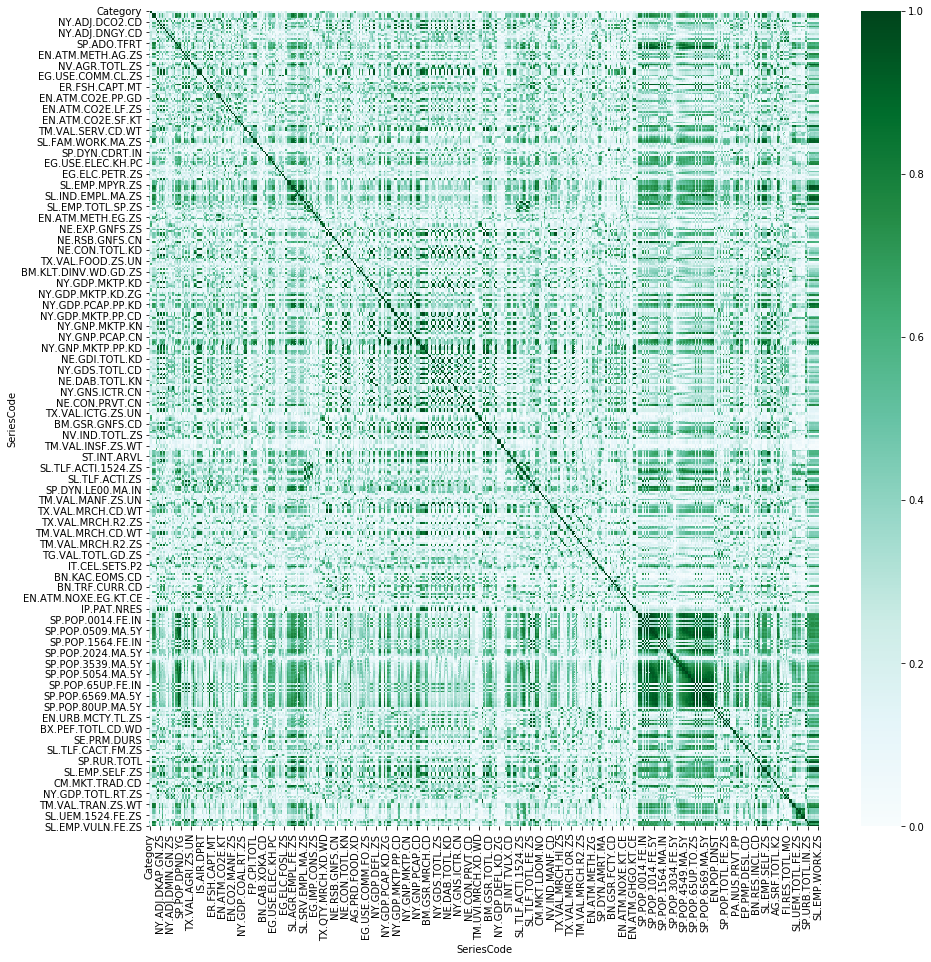

In [28]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr,cmap='BuGn')

In [29]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if (corr.iloc[i,j] >= 0.9):
            if columns[j]:
                columns[j] = False
selected_columns = train_df_full.columns[columns]
train_df_corr = train_df_full[selected_columns]

In [30]:
train_df_corr.head()

SeriesCode Category  Year  EG.ELC.ACCS.ZS  NY.ADJ.DCO2.GN.ZS  NY.ADJ.DCO2.CD  \
0               EMI  1995       69.233383           0.908101     694243143.2   
1               EMI  1996       70.332176           0.865304     745287858.2   
2               EMI  1997       71.435493           1.025398     892355411.6   
3               EMI  1998       71.300000           1.094186     903862410.2   
4               EMI  1999       71.874171           1.003381     947703576.1   

SeriesCode  NY.ADJ.DKAP.GN.ZS  NY.ADJ.DKAP.CD  NY.ADJ.AEDU.GN.ZS  \
0                    8.748619    6.688318e+09           2.500000   
1                    8.433853    7.264089e+09           2.800000   
2                    8.116023    7.062990e+09           2.900000   
3                    7.820673    6.460338e+09           3.116014   
4                    7.502385    7.086078e+09           2.843007   

SeriesCode  NY.ADJ.DNGY.GN.ZS  NY.ADJ.DNGY.CD  ...  BN.RES.INCL.CD  \
0                    0.009646     7374707.965  ...    1.235398e+09   
1                    0.005985     5155290.479  ...    4.338014e+09   
2                    0.001990     1732204.582  ...   -3.094421e+09   
3                    0.003879     3204449.797  ...    1.279082e+09   
4                    0.001500     1417159.855  ...    3.767063e+09   

SeriesCode  SE.SEC.DURS  NV.SRV.TOTL.ZS  CM.MKT.TRAD.GD.ZS  FI.RES.TOTL.MO  \
0                   4.0       46.310582          19.787915        2.613809   
1                   4.0       47.296266          30.791759        3.204902   
2                   4.0       48.994640          24.713319        1.961715   
3                   4.0       50.849963          14.549705        3.074316   
4                   4.0       51.733001          23.349209        5.172271   

SeriesCode  TM.VAL.TRAN.ZS.WT  SL.UEM.TOTL.FE.ZS  SL.UEM.TOTL.MA.ZS  \
0                   29.698813              4.067              3.433   
1                   24.350511              4.115              3.423   
2                   18.993818              4.084              3.426   
3                   19.658967              3.916              3.525   
4                   39.649054              4.064              3.499   

SeriesCode  SL.UEM.1524.FE.ZS  SP.URB.GROW  
0                      11.708     2.141819  
1                      11.907     2.108909  
2                      11.957     2.072943  
3                      11.683     2.038898  
4                      12.015     2.006995  

[5 rows x 191 columns]

In [31]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', -1)

In [32]:
train_dfsrslist=train_df_corr.columns.to_frame()
train_dfsrslist.head()

SeriesCode
SeriesCode                          
Category           Category         
Year               Year             
EG.ELC.ACCS.ZS     EG.ELC.ACCS.ZS   
NY.ADJ.DCO2.GN.ZS  NY.ADJ.DCO2.GN.ZS
NY.ADJ.DCO2.CD     NY.ADJ.DCO2.CD

### 7. Variable reduction based on the heatmap 

In [33]:
train_dfsrs=train_df_concateseries[['SeriesName','SeriesCode']]
train_dfsrs=train_dfsrs.drop_duplicates()
train_dfsrslist=train_df_corr.columns.to_frame()
train_dfsrslist.rename(columns={'SeriesCode':'List'},inplace=True)
train_dfsrslist.reset_index()
train_dfsrslist=train_dfsrslist.drop(columns ='List')
train_dfsrslist=train_dfsrslist.iloc[2:]
train_dfsrslist
corrcols = pd.merge(left=train_dfsrs, right=train_dfsrslist, left_on='SeriesCode', right_on='SeriesCode', how='inner')
corrcols.drop_duplicates(inplace=True) 

In [34]:
corrcols.head()

SeriesName  \
0  Access to electricity (% of population)                        
1  Adjusted savings: carbon dioxide damage (% of GNI)             
2  Adjusted savings: carbon dioxide damage (current US$)          
3  Adjusted savings: consumption of fixed capital (% of GNI)      
4  Adjusted savings: consumption of fixed capital (current US$)   

          SeriesCode  
0  EG.ELC.ACCS.ZS     
1  NY.ADJ.DCO2.GN.ZS  
2  NY.ADJ.DCO2.CD     
3  NY.ADJ.DKAP.GN.ZS  
4  NY.ADJ.DKAP.CD

### 8. Investigation on Factors affecting immigration and emigration based on the Feature Selection Algorithm

The feature selector library being used below is available here: https://towardsdatascience.com/a-feature-selection-tool-for-machine-learning-in-python-b64dd23710f0 , feature selector tool created by https://towardsdatascience.com/@williamkoehrsen

In [35]:
train_fs=train_df_corr.copy()
train_fs.to_csv('corr_results.csv')

In [36]:
# Creating train and train-labels which are required in the feature selector algorithm that is to be used below:
train_labels = train_fs['Category']
train = train_fs.drop(columns = ['Category'])
train.head()

SeriesCode  Year  EG.ELC.ACCS.ZS  NY.ADJ.DCO2.GN.ZS  NY.ADJ.DCO2.CD  \
0           1995  69.233383       0.908101           694243143.2      
1           1996  70.332176       0.865304           745287858.2      
2           1997  71.435493       1.025398           892355411.6      
3           1998  71.300000       1.094186           903862410.2      
4           1999  71.874171       1.003381           947703576.1      

SeriesCode  NY.ADJ.DKAP.GN.ZS  NY.ADJ.DKAP.CD  NY.ADJ.AEDU.GN.ZS  \
0           8.748619           6.688318e+09    2.500000            
1           8.433853           7.264089e+09    2.800000            
2           8.116023           7.062990e+09    2.900000            
3           7.820673           6.460338e+09    3.116014            
4           7.502385           7.086078e+09    2.843007            

SeriesCode  NY.ADJ.DNGY.GN.ZS  NY.ADJ.DNGY.CD  NY.ADJ.ICTR.GN.ZS  ...  \
0           0.009646           7374707.965     18.289415          ...   
1           0.005985           5155290.479     18.536890          ...   
2           0.001990           1732204.582     20.064003          ...   
3           0.003879           3204449.797     25.573526          ...   
4           0.001500           1417159.855     31.457418          ...   

SeriesCode  BN.RES.INCL.CD  SE.SEC.DURS  NV.SRV.TOTL.ZS  CM.MKT.TRAD.GD.ZS  \
0           1.235398e+09    4.0          46.310582       19.787915           
1           4.338014e+09    4.0          47.296266       30.791759           
2          -3.094421e+09    4.0          48.994640       24.713319           
3           1.279082e+09    4.0          50.849963       14.549705           
4           3.767063e+09    4.0          51.733001       23.349209           

SeriesCode  FI.RES.TOTL.MO  TM.VAL.TRAN.ZS.WT  SL.UEM.TOTL.FE.ZS  \
0           2.613809        29.698813          4.067               
1           3.204902        24.350511          4.115               
2           1.961715        18.993818          4.084               
3           3.074316        19.658967          3.916               
4           5.172271        39.649054          4.064               

SeriesCode  SL.UEM.TOTL.MA.ZS  SL.UEM.1524.FE.ZS  SP.URB.GROW  
0           3.433              11.708             2.141819     
1           3.423              11.907             2.108909     
2           3.426              11.957             2.072943     
3           3.525              11.683             2.038898     
4           3.499              12.015             2.006995     

[5 rows x 190 columns]

In [37]:
train_fs = train.copy()
train_fs.to_csv('train_fs_results.csv', index=False)

In [38]:
train_fs_df = pd.read_csv('train_fs_results.csv')

In [39]:
train_fs_df.head()

Year  EG.ELC.ACCS.ZS  NY.ADJ.DCO2.GN.ZS  NY.ADJ.DCO2.CD  NY.ADJ.DKAP.GN.ZS  \
0  1995  69.233383       0.908101           694243143.2     8.748619            
1  1996  70.332176       0.865304           745287858.2     8.433853            
2  1997  71.435493       1.025398           892355411.6     8.116023            
3  1998  71.300000       1.094186           903862410.2     7.820673            
4  1999  71.874171       1.003381           947703576.1     7.502385            

   NY.ADJ.DKAP.CD  NY.ADJ.AEDU.GN.ZS  NY.ADJ.DNGY.GN.ZS  NY.ADJ.DNGY.CD  \
0  6.688318e+09    2.500000           0.009646           7374707.965      
1  7.264089e+09    2.800000           0.005985           5155290.479      
2  7.062990e+09    2.900000           0.001990           1732204.582      
3  6.460338e+09    3.116014           0.003879           3204449.797      
4  7.086078e+09    2.843007           0.001500           1417159.855      

   NY.ADJ.ICTR.GN.ZS  ...  BN.RES.INCL.CD  SE.SEC.DURS  NV.SRV.TOTL.ZS  \
0  18.289415          ...  1.235398e+09    4.0          46.310582        
1  18.536890          ...  4.338014e+09    4.0          47.296266        
2  20.064003          ... -3.094421e+09    4.0          48.994640        
3  25.573526          ...  1.279082e+09    4.0          50.849963        
4  31.457418          ...  3.767063e+09    4.0          51.733001        

   CM.MKT.TRAD.GD.ZS  FI.RES.TOTL.MO  TM.VAL.TRAN.ZS.WT  SL.UEM.TOTL.FE.ZS  \
0  19.787915          2.613809        29.698813          4.067               
1  30.791759          3.204902        24.350511          4.115               
2  24.713319          1.961715        18.993818          4.084               
3  14.549705          3.074316        19.658967          3.916               
4  23.349209          5.172271        39.649054          4.064               

   SL.UEM.TOTL.MA.ZS  SL.UEM.1524.FE.ZS  SP.URB.GROW  
0  3.433              11.708             2.141819     
1  3.423              11.907             2.108909     
2  3.426              11.957             2.072943     
3  3.525              11.683             2.038898     
4  3.499              12.015             2.006995     

[5 rows x 190 columns]

In [40]:
from feature_selector import FeatureSelector
fs = FeatureSelector(train_fs_df,train_labels)

0 features with greater than 0.90 missing values.



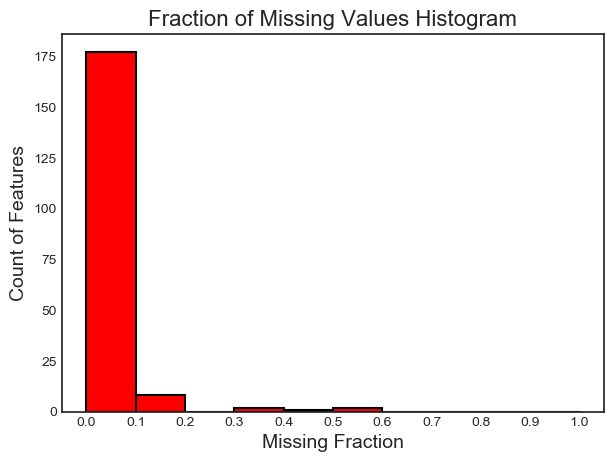

In [41]:
fs.identify_missing(0.9)
fs.plot_missing()

0 features with a single unique value.



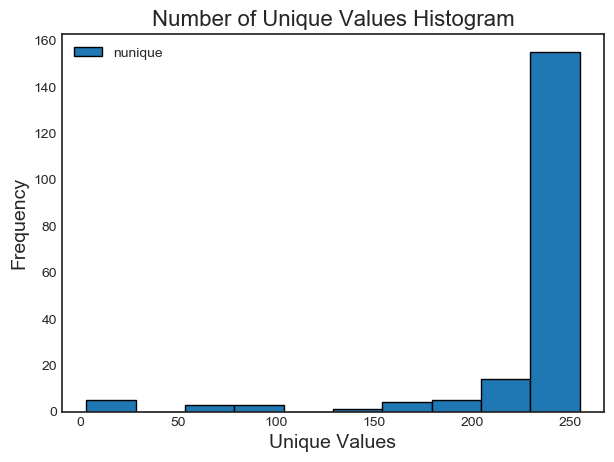

In [42]:
fs.identify_single_unique()
fs.plot_unique() 

16 features with a correlation magnitude greater than 0.85.



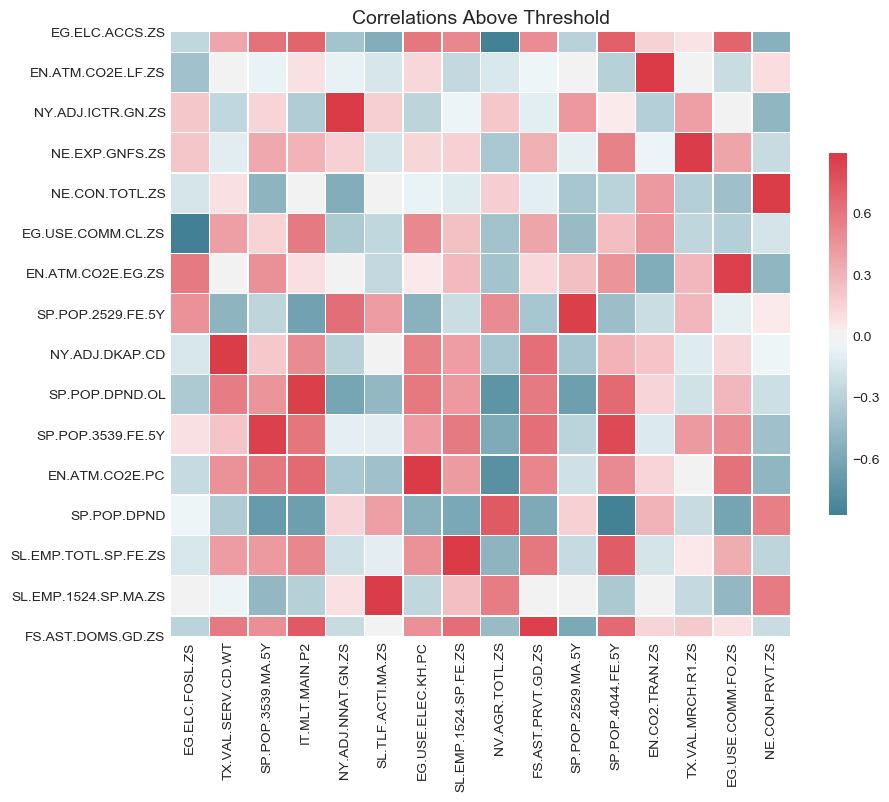

In [43]:
fs.identify_collinear(0.85)
fs.plot_collinear()

In [44]:
fs.record_collinear.head()

drop_feature       corr_feature  corr_value
0  NY.ADJ.NNAT.GN.ZS  NY.ADJ.ICTR.GN.ZS  0.889949  
1  NV.AGR.TOTL.ZS     EG.ELC.ACCS.ZS    -0.868101  
2  EN.CO2.TRAN.ZS     EN.ATM.CO2E.LF.ZS  0.886559  
3  TX.VAL.SERV.CD.WT  NY.ADJ.DKAP.CD     0.881213  
4  FS.AST.PRVT.GD.ZS  FS.AST.DOMS.GD.ZS  0.857636

In [45]:
fs_coll_col = fs.record_collinear

In [46]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.949605	valid_0's binary_logloss: 0.661813
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.938735	valid_0's binary_logloss: 0.632186
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3]	valid_0's auc: 0.858696	valid_0's binary_logloss: 0.632749
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.916996	valid_0's binary_logloss: 0.662704
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.909091	valid_0's binary_logloss: 0.665036
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2]	valid_0's auc: 0.90415	valid_0's binary_logloss: 0.64013
Training

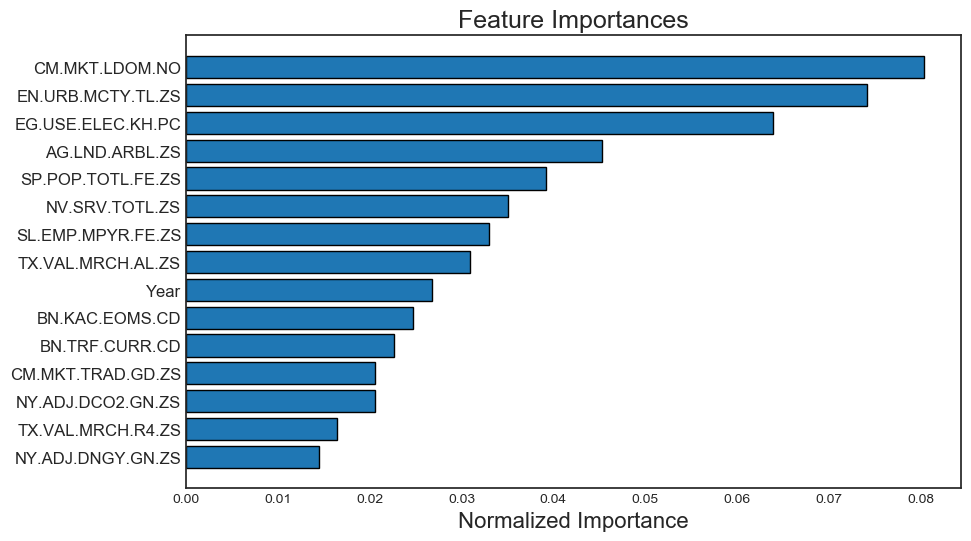

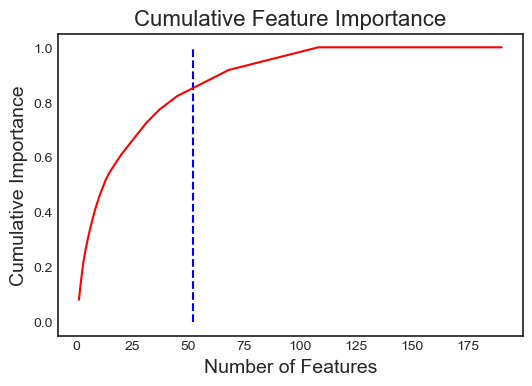

52 features required for 0.85 of cumulative importance


In [47]:
fs.plot_feature_importances(threshold = 0.85)

In [48]:
fs.identify_single_unique()


0 features with a single unique value.



### 9. Applying PCA

In [49]:
train_df_pca=train_fs_df.copy()

In [50]:
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA
train_df_pca.dropna(inplace=True)
array = train_df_pca.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
pca = PCA(n_components=5)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)
print(pca)
pca = PCA(n_components=5)

Explained Variance: [9.97099816e-01 2.90018402e-03 8.13919957e-22 4.07329686e-23
 1.30069643e-23]
[[ 3.92016904e-13  1.01777248e-11 -7.56950931e-13  5.35615570e-02
   2.86037346e-12  9.98564550e-01  8.52156340e-13 -1.18744939e-12]
 [ 2.64738772e-12 -3.93657926e-11  3.63039050e-11  9.98564550e-01
   2.22913196e-12 -5.35615570e-02 -2.03041774e-11  3.45084062e-11]
 [-7.65609010e-03 -9.85301072e-01  8.10218501e-03 -3.68879740e-11
  -1.52555964e-01  1.24323369e-11 -4.46056774e-02 -6.15999036e-02]
 [-3.09583052e-05 -2.80542843e-02  3.01687601e-01 -4.51275791e-11
  -1.62615348e-01  4.56905589e-12 -6.31737995e-02  9.36889997e-01]
 [ 1.79417777e-01  1.54702556e-01 -1.37902704e-01  1.59126436e-11
  -9.52989332e-01  2.36703049e-14 -4.85496011e-02 -1.19639014e-01]]
PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


## 10. Sample Features visualization

In [51]:
data_vizimi = pd.merge(left=merged_inner_imifilter, right=fs_coll_col, left_on='SeriesCode', right_on='corr_feature', how='inner')
data_vizimi.drop(columns=['Series','drop_feature','corr_feature'],inplace=True)

In [52]:
data_vizemi = pd.merge(left=merged_inner_emifilter, right=fs_coll_col, left_on='SeriesCode', right_on='corr_feature', how='inner')
data_vizemi.drop(columns=['Series','drop_feature','corr_feature'],inplace=True)

In [53]:
data_vizimi['category']='IMI'
data_vizemi['category']='EMI'
data_vizmi=pd.concat([data_vizimi,data_vizemi])
#data_vizmi.to_csv('mipre0.csv')

In [54]:
data_vizmi.head()

CountryName CountryCode                               SeriesName  \
0  Canada                CAN         Access to electricity (% of population)   
1  France                FRA         Access to electricity (% of population)   
2  Germany               DEU         Access to electricity (% of population)   
3  Hong Kong SAR, China  HKG         Access to electricity (% of population)   
4  India                 IND         Access to electricity (% of population)   

       SeriesCode         1995        1996         1997        1998  1999  \
0  EG.ELC.ACCS.ZS  100          100         100          100         100    
1  EG.ELC.ACCS.ZS  100          100         100          100         100    
2  EG.ELC.ACCS.ZS  100          100         100          100         100    
3  EG.ELC.ACCS.ZS  100          100         100          100         100    
4  EG.ELC.ACCS.ZS  51.39855576  52.9855957  54.57716751  56.1731987  60.1   

          2000  ...         2003  2004         2005  2006         2007  \
0  100          ...  100          100   100          100   100           
1  100          ...  100          100   100          100   100           
2  100          ...  100          100   100          100   100           
3  100          ...  100          100   100          100   100           
4  59.36185074  ...  64.06238556  64.4  67.08669281  67.9  70.05211639   

          2008 2009 Counts corr_value  category  
0  100          100  19    -0.868101   IMI       
1  100          100  19    -0.868101   IMI       
2  100          100  19    -0.868101   IMI       
3  100          100  19    -0.868101   IMI       
4  71.54550934  75   19    -0.868101   IMI       

[5 rows x 22 columns]

In [55]:
data_vizmip=data_vizmi.melt(id_vars =['CountryName','CountryCode','SeriesName','SeriesCode','category'], value_vars =['1995', '1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009'],  
var_name ='Year', value_name ='Values') 
data_vizmip.to_csv('mipre.csv')


In [56]:
data_vizmip=read_csv('mipre.csv')
data_vizmip
data_vizmip['RN'] =  data_vizmip.groupby(['SeriesCode','Year'])['Values'].rank(method='first',ascending=False)
data_vizmip['RNRev'] =  data_vizmip.groupby(['SeriesCode','Year'])['Values'].rank(method='first',ascending=True)
data_vizmip
data_vizmip.sort_values(by=['SeriesCode', 'Year','Values','RN'])
data_vizmip.to_csv('mi.csv')

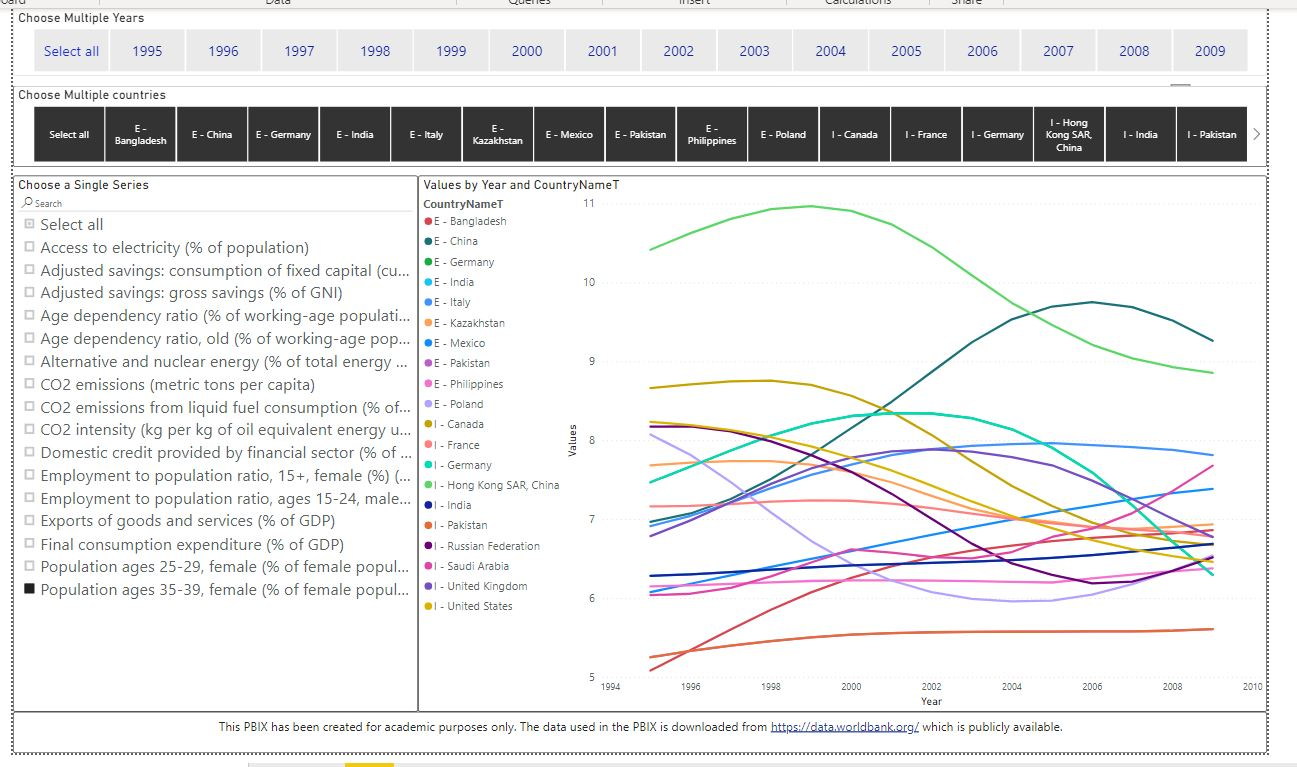

## 11. Hypothesis Testing

In [57]:
from numpy.random import shuffle
import networkx as nx
import scipy.stats as stats
G = nx.DiGraph()
G.add_nodes_from(nodes_list)
G.add_weighted_edges_from(df_adjList)

In [58]:
nx.write_gml(G, "digraphProjectweighted.gml")
migrationgml = nx.read_gml("digraphProjectweighted.gml")

In [60]:
migration = migrationgml
migration = nx.DiGraph(migration)
print(type(migration).__name__)

DiGraph


In [90]:
migration_assortativity = nx.degree_assortativity_coefficient(migration)
migration_transitivity = nx.transitivity(migration)
print(migration_assortativity)
print(migration_transitivity)

-0.20370890692763713
0.6108232361458825


In [93]:
# Function to compute the measures using the configuration model
degree_sequence = list(dict(nx.degree(migration)).values())
transitivity = []
assortativity = []
def model_metrics(graph,n):
    for i in range(n):
        null_graph = nx.configuration_model(degree_sequence)
        null_graph = nx.Graph(null_graph)
        null_graph.remove_edges_from(null_graph.selfloop_edges()) 
        transitivity.append(nx.transitivity(null_graph))
        assortativity.append(nx.degree_assortativity_coefficient(null_graph))
    return transitivity, assortativity
migration_mod_transitivity, migration_mod_assortativity = model_metrics(migration,1000)

In [94]:
p_zscores_assortativity = stats.zscore( [migration_assortativity]+ migration_mod_assortativity)
p_zscores_transitivity = stats.zscore([migration_transitivity] + migration_mod_transitivity)

# Just print out the first score which corresponds to the real network
print(p_zscores_assortativity[0])
print(p_zscores_transitivity[0])

-19.039114434272477
-1.55745504941914


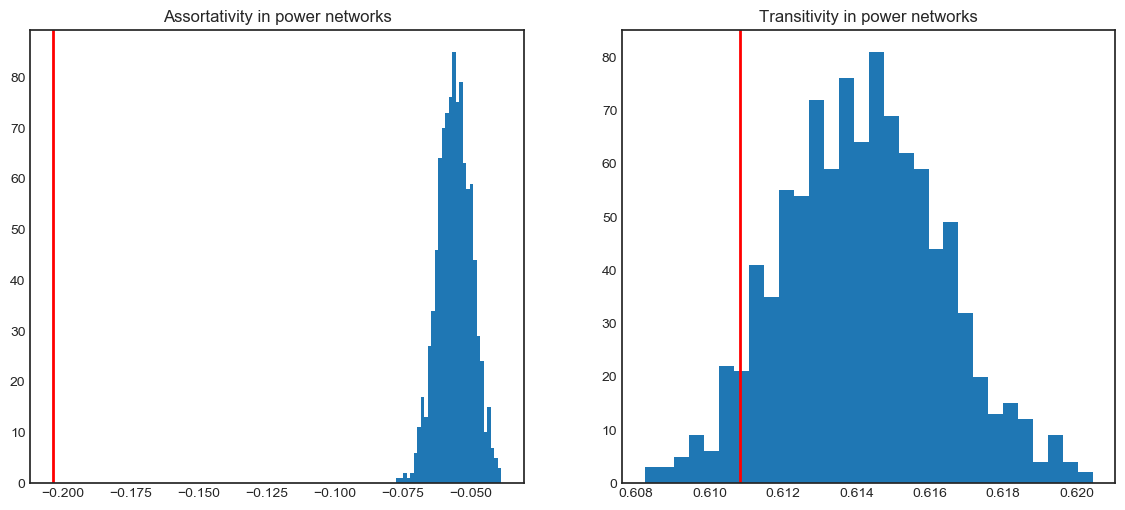

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(14,6))
# Use the histogram function to plot the distribution of assortativity coefficients
plt.subplot(1, 2, 1)
plt.hist(migration_mod_assortativity, bins=30)
plt.axvline(migration_assortativity, lw=2, color="red")
plt.title('Assortativity in power networks')
# Use the histogram function to plot the distribution of transitivity coefficients
plt.subplot(1, 2, 2)
plt.hist(migration_mod_transitivity,bins=30)
plt.axvline(migration_transitivity,lw=2,color='red')
plt.title('Transitivity in power networks')
plt.show()

__Conclusion__

Due to the high P value we can say that we fail to reject the null hypothesis. So there is evidence to show that the assortivity and transitivity affect the migration network and these can be accounted for by the degree sequence.

Since migration networks highly rely on connectivity between nodes connected to the same node and assortative mixing which is the preference for a network's nodes to attach to others that are similar in some way , especially among the top influential countries for emigration and immigration provide further clarity on our inferences. 

## 12. Inferences / Discussions

For the purposes of investigation we will be considering 1 Country identified as an emigrant country (Mexico) and Validate the selected features against all of the Immigrant countries. In a similar manner we will be considering 1 Country (United States) and will be validating the features against all of the Immigration Countries. In order to plot these inferences a data visualization tool such as power BI was used to show the relationship between these factors and to study the impacts to immigration.

**Inference 1: Factors comparing with countries with higher out degree and higher in degree**

#### Female Population (25-29)

Immigrant countries Vs Mexico

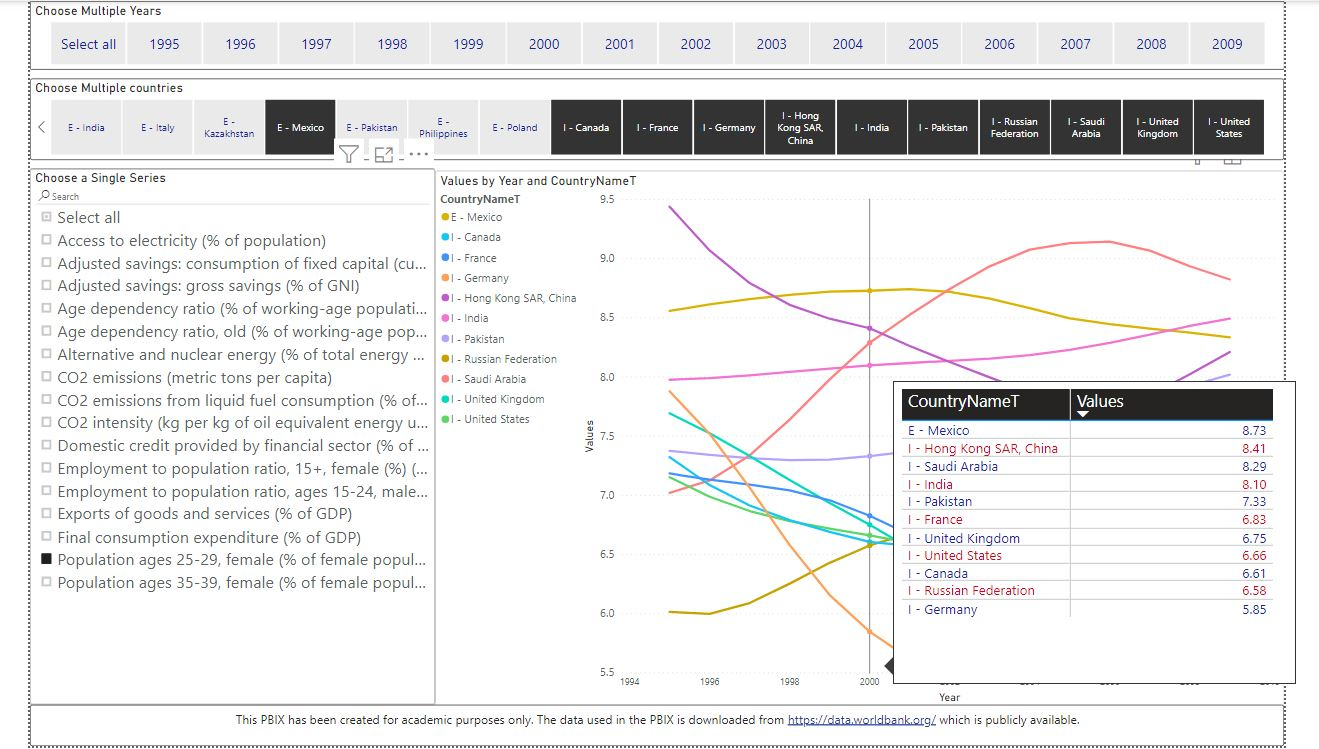

Emigrant countries Vs USA

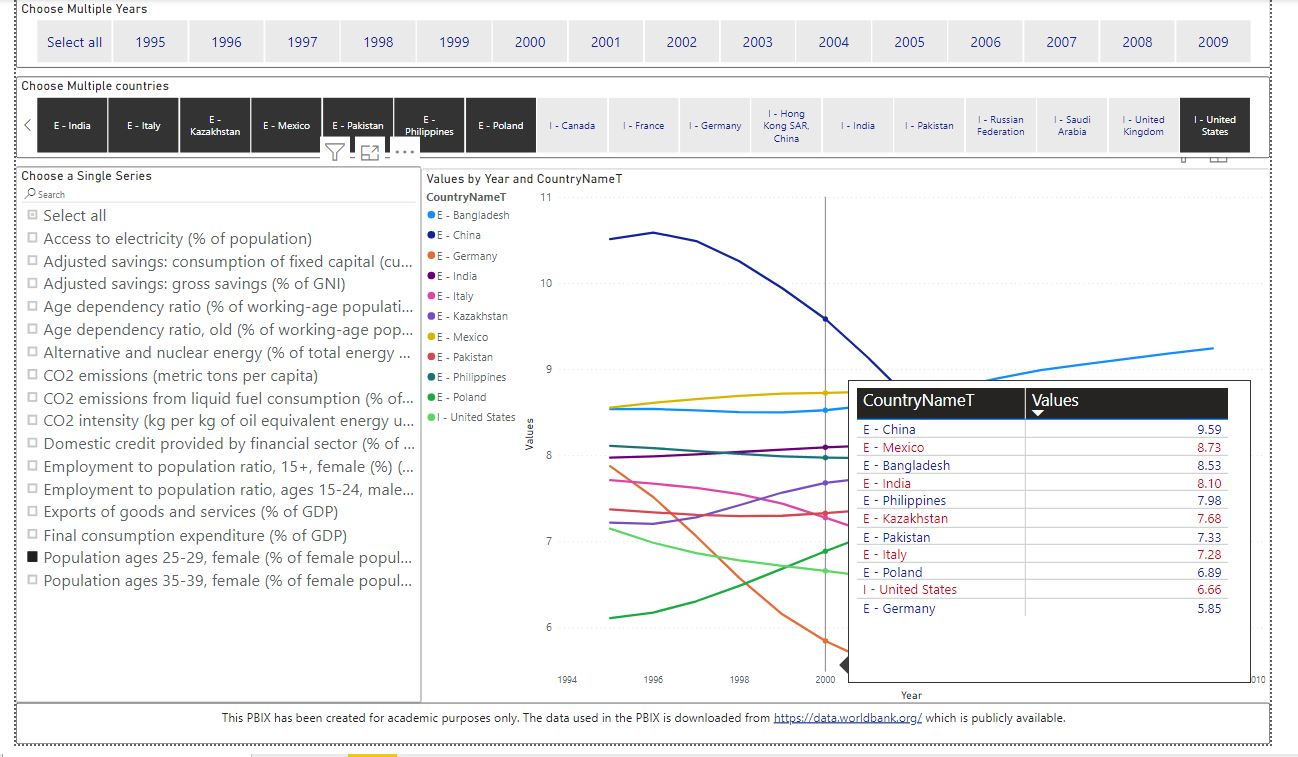

We can see that the selected feature shows that the countries of highter average weighted in degree have lesser female populations between the ages of 25-29.<br> 
<font color=darkblue> As cited in __: Gender and Migration: An Integrative Approach , By Nana Oishi  (https://ccis.ucsd.edu/_files/wp49.pdf)  :__<br>
"The patterns of international female migration can be explained by three levels of
analyses from the “sending side”: (1) the state; (2) individuals; and (3) society. At the state
level, emigration policies treat men and women differently. Because women are not a valueneutral workforce but the symbols of national dignity and pride, the government tends to have
protective and restrictive emigration policies for women. Emigration policies for women tend to
be value-driven rather than those for men which are economically driven."</font>

#### Domestic Credit

Immigrant countries Vs Mexico

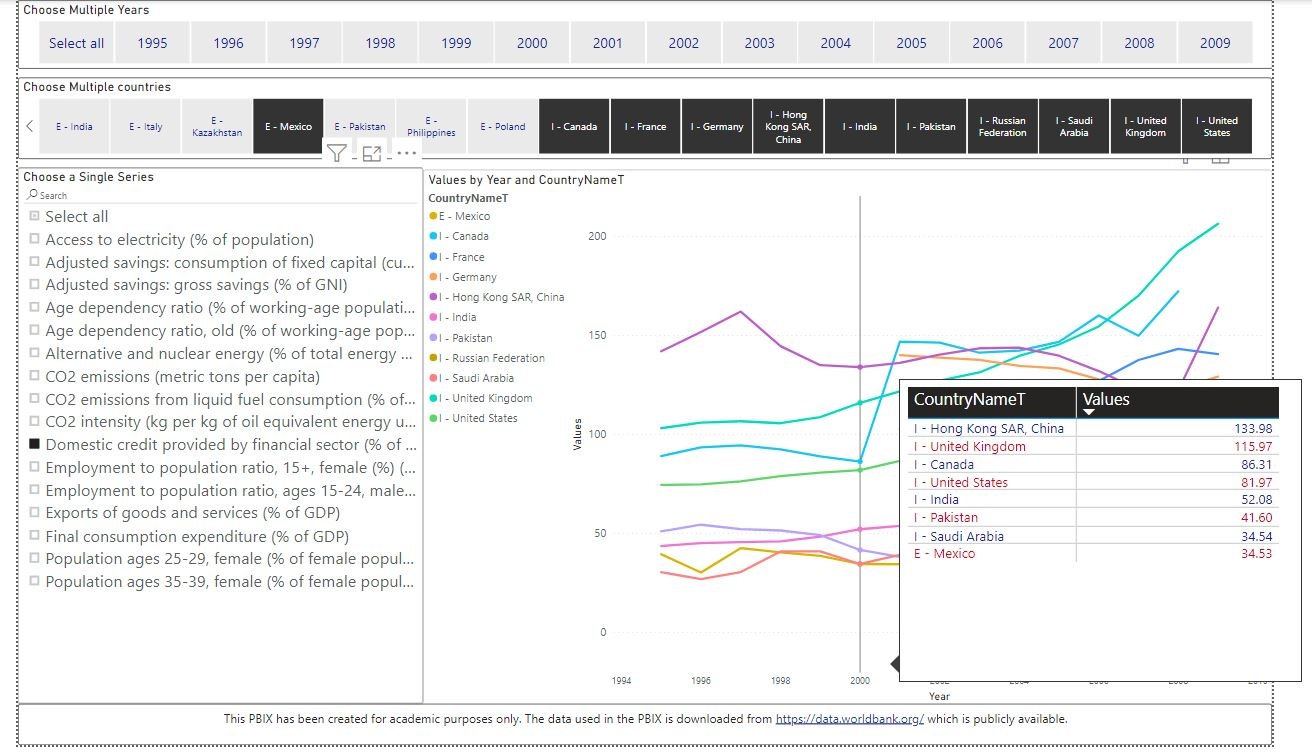

Emigrant countries Vs USA

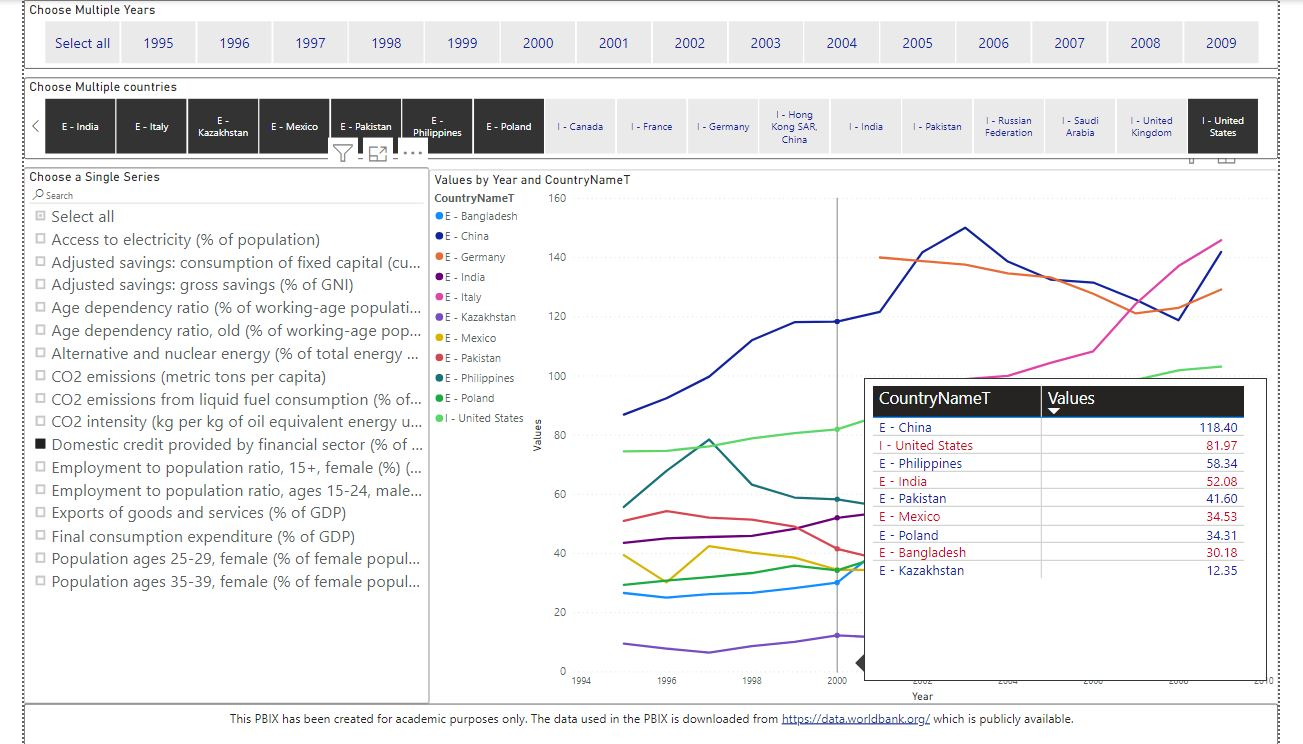

As seen in the visuals above, we can see that indeed the immigrant countries do much better at providing domestic credit.On further study of this issue as cited in : <br> <font color=darkblue> __Luu, Trang Heidi, "International Migration and FDI: Can Migrant Networks Foster Investments toward Origin Countries?" (2019). Honors Projects. 141.  https://digitalcommons.iwu.edu/econ_honproj/141<br>__</font> "When correcting for nonstationarity, US FDI toward the foreign country is found to
be negatively impacted by both the acceleration in the country’s GDP per capita and the
geographical distance between the two. The foreign country’s domestic credit to the private
sector, on the other hand, seems to be significant in attracting FDI in this model."

#### Age dependency ratio

Immigrant countries Vs Mexico

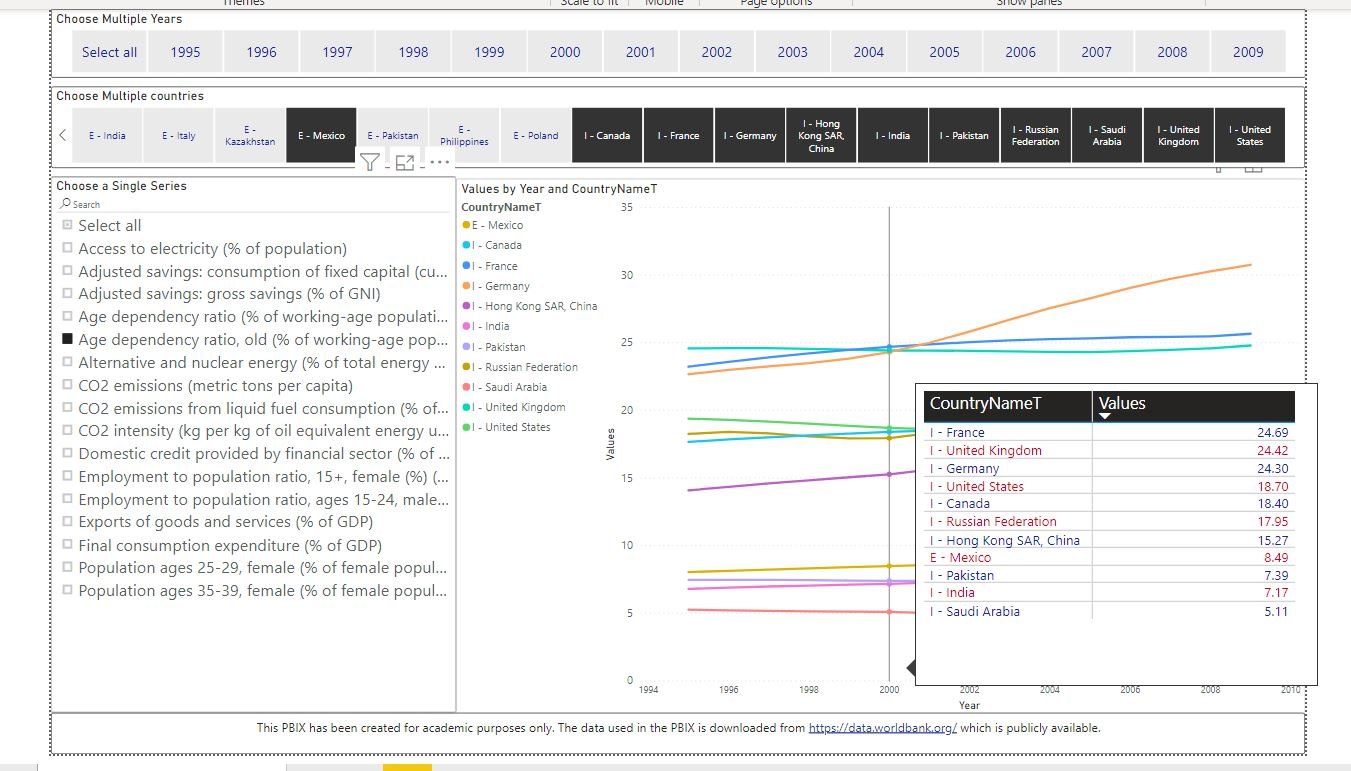

Emigrant countries Vs USA

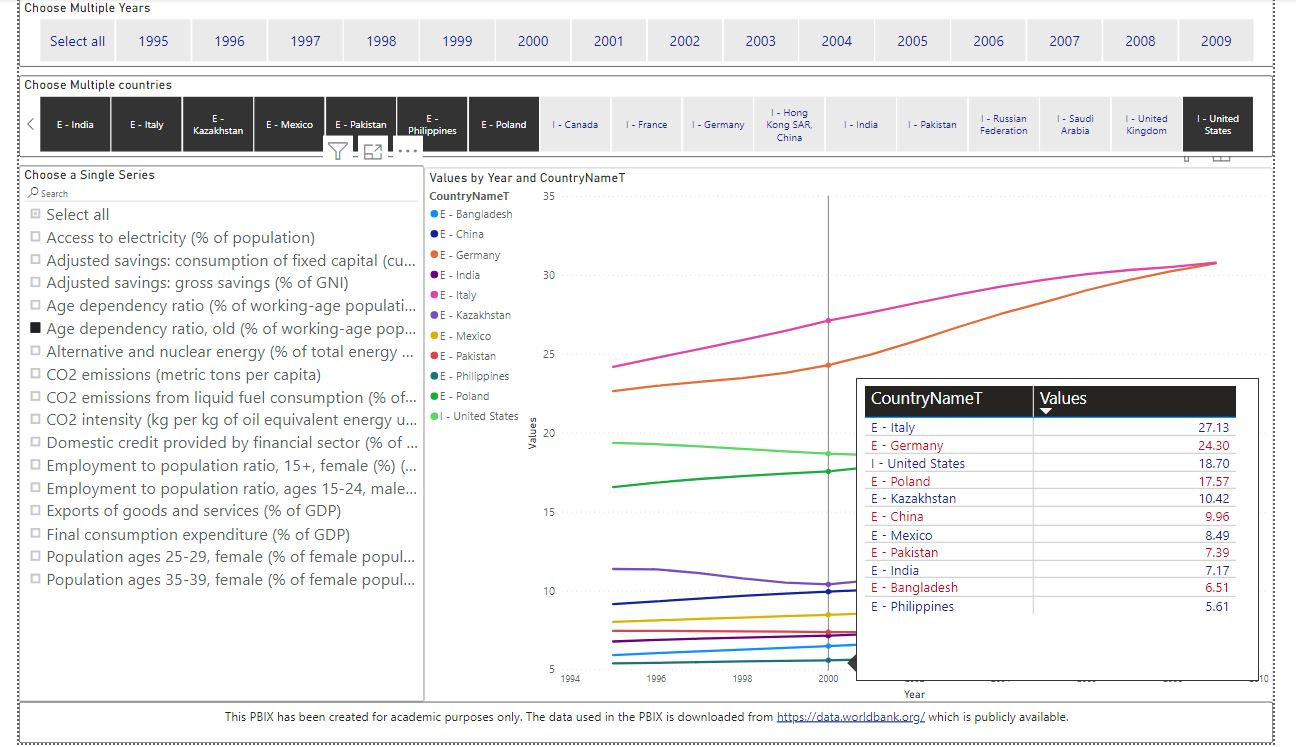

As seen in the visuals above,the immigrant countries have more age dependency ratio <br> <font color=darkblue> __"https://wol.iza.org/uploads/articles/99/pdfs/impact-of-aging-on-scale-of-migration.pdf"__</font><br> 
As cited "The majority of international migrants move from less- to more-developed countries, with
the largest shares of migrants being working-age individuals. However, the proportion of
elderly migrants is also non-negligible  "

#### Inference 2: Betweenness & Closeness centrality

This accounts for for the indirect interactions between countries and population of the destination country. Hence Poland plays a critical role in migrations across the globe. Factors associated with Poland were investigated.

In [96]:
dfGraph = pd.read_csv (r'project_migrationgexftableweight.csv')
dfGraph=dfGraph.sort_values(by='Weighted Degree', ascending=False)
dfGraphclose=dfGraph.nlargest(10, 'closnesscentrality')
dfGraphclose

Id Label  timeset  indegree  outdegree  Degree  weighted indegree  \
90   IND  IND  NaN       170       209        379     5997163             
73   DEU  DEU  NaN       176       209        385     6565407             
67   FRA  FRA  NaN       195       209        404     5049424             
40   CHN  CHN  NaN       167       205        372     187598              
96   ITA  ITA  NaN       177       205        382     1755028             
34   CAN  CAN  NaN       178       202        380     3893103             
141  NLD  NLD  NaN       190       193        383     988265              
109  LBN  LBN  NaN       123       192        315     268265              
11   AUS  AUS  NaN       197       186        383     2383351             
160  POL  POL  NaN       175       184        359     411221              

     weighted outdegree  Weighted Degree  Eccentricity  closnesscentrality  \
90   9516831             15513994         2             0.933610             
73   3602196             10167603         2             0.933610             
67   1766731             6816155          2             0.933610             
40   5814587             6002185          2             0.918367             
96   3136335             4891363          2             0.918367             
34   1255438             5148541          2             0.907258             
141  774792              1763057          2             0.875486             
109  676993              945258           2             0.872093             
11   461581              2844932          2             0.852273             
160  5147176             5558397          2             0.845865             

     harmonicclosnesscentrality  betweenesscentrality  Authority       Hub  \
90   0.964444                    720.872382            0.089975   0.109982   
73   0.964444                    627.919010            0.093989   0.110469   
67   0.964444                    822.182988            0.099459   0.110282   
40   0.955556                    490.715700            0.095930   0.108390   
96   0.955556                    559.389161            0.097902   0.108886   
34   0.948889                    651.231636            0.093337   0.108459   
141  0.928889                    604.168520            0.099388   0.105839   
109  0.926667                    223.004460            0.077152   0.106293   
11   0.913333                    792.141136            0.098669   0.102209   
160  0.908889                    587.194522            0.098982   0.101264   

     modularity_class  pageranks  componentnumber  strongcompnum  
90   0                 0.012703   0                0              
73   4                 0.028956   0                0              
67   4                 0.033840   0                0              
40   2                 0.003575   0                0              
96   4                 0.016744   0                0              
34   2                 0.024755   0                0              
141  4                 0.010966   0                0              
109  0                 0.003964   0                0              
11   4                 0.022312   0                0              
160  4                 0.004924   0                0

In [97]:
dfGraphbet=dfGraph.nlargest(10, 'betweenesscentrality')
dfGraphbet

Id Label  timeset  indegree  outdegree  Degree  weighted indegree  \
67   FRA  FRA  NaN       195       209        404     5049424             
11   AUS  AUS  NaN       197       186        383     2383351             
213  USA  USA  NaN       175       140        315     30682228            
90   IND  IND  NaN       170       209        379     5997163             
106  KGZ  KGZ  NaN       150       89         239     117356              
212  GBR  GBR  NaN       173       153        326     4263012             
34   CAN  CAN  NaN       178       202        380     3893103             
73   DEU  DEU  NaN       176       209        385     6565407             
76   GRC  GRC  NaN       196       183        379     656594              
141  NLD  NLD  NaN       190       193        383     988265              

     weighted outdegree  Weighted Degree  Eccentricity  closnesscentrality  \
67   1766731             6816155          2             0.933610             
11   461581              2844932          2             0.852273             
213  113110              30795338         2             0.725806             
90   9516831             15513994         2             0.933610             
106  694967              812323           2             0.623269             
212  101731              4364743          2             0.757576             
34   1255438             5148541          2             0.907258             
73   3602196             10167603         2             0.933610             
76   1049952             1706546          2             0.842697             
141  774792              1763057          2             0.875486             

     harmonicclosnesscentrality  betweenesscentrality  Authority       Hub  \
67   0.964444                    822.182988            0.099459   0.110282   
11   0.913333                    792.141136            0.098669   0.102209   
213  0.811111                    736.901989            0.090643   0.061953   
90   0.964444                    720.872382            0.089975   0.109982   
106  0.697778                    680.270531            0.084051   0.053057   
212  0.840000                    668.934425            0.094115   0.069484   
34   0.948889                    651.231636            0.093337   0.108459   
73   0.964444                    627.919010            0.093989   0.110469   
76   0.906667                    621.574943            0.103384   0.102725   
141  0.928889                    604.168520            0.099388   0.105839   

     modularity_class  pageranks  componentnumber  strongcompnum  
67   4                 0.033840   0                0              
11   4                 0.022312   0                0              
213  2                 0.120226   0                0              
90   0                 0.012703   0                0              
106  5                 0.001292   0                0              
212  4                 0.029515   0                0              
34   2                 0.024755   0                0              
73   4                 0.028956   0                0              
76   4                 0.004300   0                0              
141  4                 0.010966   0                0

# Conclusion

Based on the above methodology, we were able to build relevant network diagrams upon cleanup of the data, We observed that there are significant countries that can be identified based on the links between the nodes which are the countries and links which are the connections between the nodes. <br>

- We applied network science techniques and machine learning approaches to find out important countries of immigration and emigration and top features
- We observed observed that there are countries that appear to be the final destination of migrations, while other countries seem to be bridges in the migration
- The countries of higher average weighted in-degree have lesser female populations between the ages of 25-29. 
- The authors explain this phenomena in terms of the social/cultural value assigned to women in some countries 
- Emigration policies for women tend to be value-driven rather than those for men which are economically driven." (Oishi, 2002)
- Domestic Credit emerges as one of the primary issue, Luu weighs on this issue, that indeed the immigrant countries do much better at providing domestic credit. (Luu, 2019)
- The pressure on the productive population of the emigrant countries is shown by the calculations of the age dependency ratio when calculating the ratio of those who are typically out of the labor force due to age, and those individuals that are typically in the labor force.
- As the numbers on this research show, the immigrant countries have more age dependency ratio, showing a larger pressure on the workforce. 
- Poland and Centrality: Even though the role of Poland is not completely clear. the indirect interactions between countries and population of the destination country show that Poland plays a critical role in migrations across the globe. This could be linked to geographical, policy and cultural reasons.


# Future Work and Research

Networks generated in this process only used data from 2000 to build the nodes and edges. This can be further expanded to additional timelines and insightful inferences can be obtained. 

* A predictive model can be built on this data to highlight top features that will change the migration balance in world. 
* New Datsets can be combined to increase data validity and accuracy. 
* A centrality based investigative approach can also be added.

# References

1. Aleskerov, F., Meshcheryakova, N., Rezyapova, A., & Shvydun, S. (2016, May). Network analysis of international migration. In International Conference on Network Analysis (pp. 177-185). Springer, Cham. Retrieved from https://arxiv.org/ftp/arxiv/papers/1806/1806.06705.pdf
2. Carrie Kortegast & Emily M. Yount (2016) Identity, Family, and Faith: U.S. Third Culture Kids Transition to College, Journal of Student Affairs Research and Practice, 53:2, 230-242, DOI: 10.1080/19496591.2016.1121148. Retrieved from: https://datacatalog.worldbank.org/identity-family-and-faith-us-third-culture-kids-transition-college
3. Blizzard, B., and Batalova, J. (2019, July 11th ) Naturalization Trends in the United States. Retrieved May 2, 2017, from https://www.migrationpolicy.org/article/naturalization-trends-united-states
4. Kate A. Walters & Faith P. Auton-Cuff (2009) A story to tell: the identity development of women growing up as third culture kids, Mental Health, Religion & Culture, 12:7, 755-772, DOI: 10.1080/13674670903029153 Retrieved from: https://www.tandfonline.com/doi/full/10.1080/13674670903029153?src=recsys
5. Light, I., Bhachu, P., & Karageorgis, S. (1989). Migration Networks and Immigrant Entrepreneurship. UCLA: Institute for Social Science Research. Retrieved from https://escholarship.org/uc/item/50g990sk
6. Nwosu, C., Batalova, J., & Auclair, G. (2014). Frequently requested statistics on immigrants and immigration in the United States. Migration Information Source. 
7. https://academic.oup.com/migration/advance-article/doi/10.1093/migration/mnz031/5543467#139580420
8. https://www.migrationpolicy.org/programs/migration-data-hub
9. https://www.migrationpolicy.org/programs/data-hub/charts/modeling-potential-us-legal-immigration-cuts
10. https://arxiv.org/pdf/1806.06705.pdf
11. https://onlinelibrary.wiley.com/doi/abs/10.1002/9781118900772.etrds0220
12. Mapping migration studies: An empirical analysis of the coming of age of a research field 
     Asya Pisarevskaya, Nathan Levy, Peter Scholten, Joost Jansen
     Migration Studies, mnz031, https://doi.org/10.1093/migration/mnz031
13. Emmanouil Tranos1,2 Masood Gheasi 1 Peter Nijkamp1,2 
     https://papers.tinbergen.nl/12123.pdf
14. Mihaela Peres ,Helian Xu ,Gang Wu 
     Community Evolution in International Migration Top1 Networks
     https://doi.org/10.1371/journal.pone.0148615
15. Small world: https://arxiv.org/pdf/1207.5849.pdf
16. https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2470525
17. The feature selector library being used below is available here: https://towardsdatascience.com/a-feature-selection-tool-for-machine-learning-in-python-b64dd23710f0 , feature selector tool created by https://towardsdatascience.com/@williamkoehrsen
18. __Luu, Trang Heidi, "International Migration and FDI: Can Migrant Networks Foster Investments toward Origin Countries?" (2019). Honors Projects. 141. https://digitalcommons.iwu.edu/econ_honproj/141
19. __"https://wol.iza.org/uploads/articles/99/pdfs/impact-of-aging-on-scale-of-migration.pdf"__
As cited "The majority of international migrants move from less- to more-developed countries, with the largest shares of migrants being working-age individuals. However, the proportion of elderly migrants is also non-negligible "



### Datasets

https://computationalsocialnetworks.springeropen.com/articles/10.1186/s40649-019-0061-6#Sec7
https://github.com/ComplexNetwork-USMigration/data/tree/master/2000-2015
https://databank.worldbank.org/source/global-bilateral-migration
